In [1]:
%matplotlib inline
import pickle
import matplotlib.pyplot as plt
import pystan
import stan_utility
import arviz as az
import os
import numpy as np
from scipy.stats import probplot

In [2]:
def plot_resid(fit):
    observed = fit.observed_data.y.values 
    predicted = np.mean(fit.posterior_predictive.y_hat.values, axis=(0,1)) 
    residuals = observed - predicted
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=[15,7])
    probplot(residuals, dist="norm", plot=ax1)
    ax2.plot(np.sort(observed, kind='mergesort'), residuals, '.')
    ax2.plot([observed.min(), observed.max()],[0,0],linestyle='--', color='r')

In [3]:
LME = stan_utility.compile_model('LME.stan', model_name="LME")
GLME = stan_utility.compile_model('GLME.stan', model_name="GLME")

Using cached StanModel
Using cached StanModel


 
 
 ____________________________________________________________________________________ 
 PMT
Inference data with groups:
	> posterior
	> sample_stats
	> posterior_predictive
	> observed_data


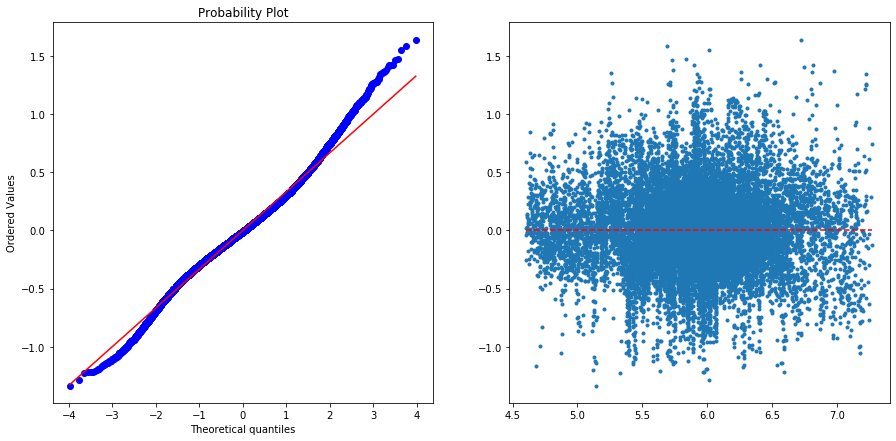

 
 
 ____________________________________________________________________________________ 
 RT
Inference data with groups:
	> posterior
	> sample_stats
	> posterior_predictive
	> observed_data


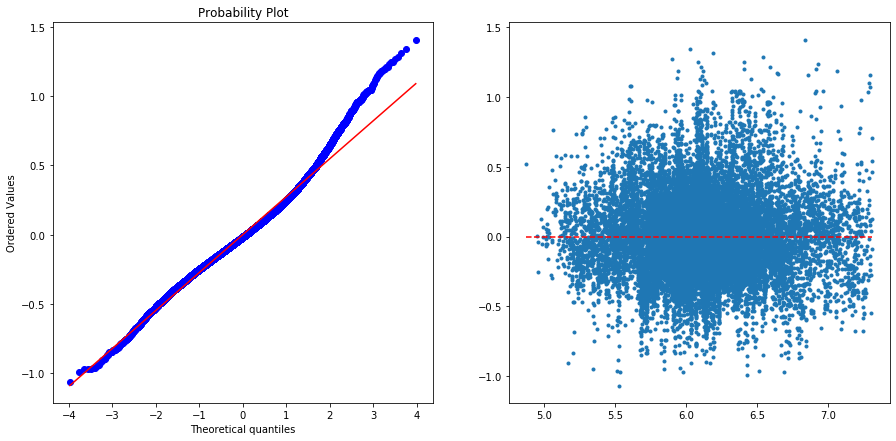

 
 
 ____________________________________________________________________________________ 
 Precision
Inference data with groups:
	> posterior
	> sample_stats
	> posterior_predictive
	> observed_data
 
 
 ____________________________________________________________________________________ 
 MT
Inference data with groups:
	> posterior
	> sample_stats
	> posterior_predictive
	> observed_data


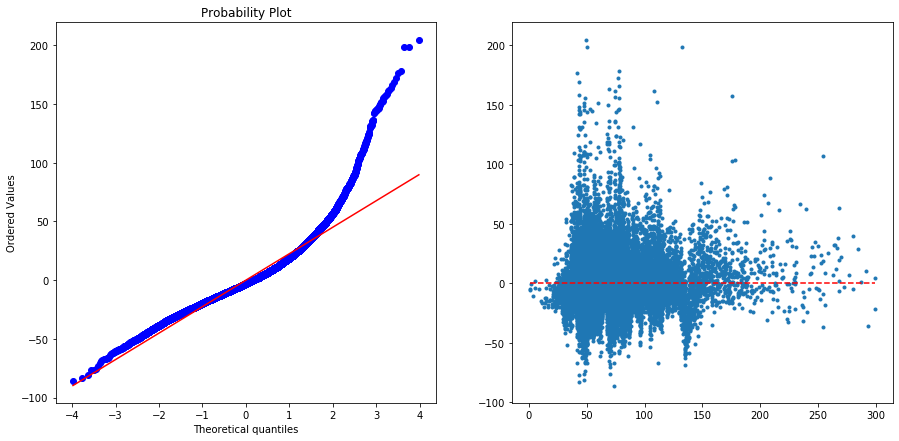

OSError: [Errno -51] NetCDF: Unknown file format: b'.ipynb_checkpoints'

In [4]:
os.chdir("FittedModels/")
path_png = "../ModelChecks/"
for f in os.listdir():
    i = f.split('_')
    dv = i[0]
    full_name = f.split('.')[0]
    fit =  az.from_netcdf(f)
    print(' \n \n ____________________________________________________________________________________ \n %s'%dv)
    print(fit)
    #stan_utility.check_treedepth(fit, max_depth=12)
    #stan_utility.check_energy(fit)
    #stan_utility.check_div(fit)
    #PPC plot
    if dv != "Precision":
        #resid plot
        plot_resid(fit)
        plt.savefig(path_png+'%s_resid.png'%full_name)
        plt.show()
        var_names = ['beta', "alpha", "sigma", "sigma_u"]
    else : 
        var_names = ['beta', "alpha", "sigma_u"]
    #ax = az.plot_ppc(fit, kind="cumulative", data_pairs = {'y' : 'y_hat'}, figsize=(10,7), textsize=15)
    #plt.savefig(path_png+'%s_PPC.png'%full_name)
    #plt.show()
    #traceplot
    #ax = az.plot_trace(fit, var_names=var_names)
    #plt.savefig(path_png+'%s_trace.png'%full_name)
    #plt.show()
    #if full_name.split('_')[-1] != "FullFe":
    ##pair plot
            #ax = az.plot_pair(fit, var_names=["sigma_u"],  divergences=True)
            #plt.savefig(path_png+'%s_corr_sigma.png'%full_name)
            #plt.show()
            #ax = az.plot_pair(fit, var_names=["beta","alpha"],  divergences=True)
            #plt.savefig(path_png+'%s_corr_betaandnalpha.png'%full_name)
            #plt.show()
        #autocorr plot
        #az.plot_autocorr(fit, var_names=['beta', "alpha", "sigma", "sigma_u"])
        #plt.savefig(path_png+'%s_autocorr.png'%dv)
        #plt.close()